Flourishing in the Workplace – An exploration

A company wishes to study the work-life balance of its employees. To do so, they have collected data from 248 employees. You are in charge of analyzing those data and to make a written report on your conclusions, as well as of making recommendations if appropriate.

1.	The data are available in an Excel file named « Base_248_HD.xlsx »
The variables of this dataset are the following:

a.	ID : identification number of the respondent (a number)

b.	Sex : the gender of the respondent

i.	The value 1 indicates a male

ii.	The value 2 indicates a female

c.	famstatus : the family status of the respondent

i.	1 : Single

ii.	2 : Separate / Divorced

iii.	3 : Couple

d.	education : The educational level of the respondent

i.	1 : Has not completed high school degree

ii.	2 : Has completed only a high school degree

iii.	3 : Has completed up to 2 years after high school degree

iv.	4 : Has completed up to 3 years after high school degree

v.	5 : Has completed up to 4 years after high school degree

vi.	6 : Has completed 5 years after high school degree or more

e.	age : age of the respondent

f.	prof_cat : the flourishing state of the respondent in an occupational context

i.	Languishing (value = 1)

ii.	Moderately Mentally Healthy (value = 2)

iii.	Flourishing (value = 3)

g.	priv_cat : the flourishing state of the respondent in a private context

i.	Languishing (value = 1)

ii.	Moderately Mentally Healthy (value = 2)

iii.	Flourishing (value = 3)

h.	positivity : the positivity ratio value, i.e., the ratio between the average positive emotions, over the average negative emotions

i.	If the ratio is lesser than 1, the individual is diagnosed as depressed

ii.	If the ratio is between 1 and 2, the individual is languishing

iii.	If the ratio is between 2 and 3, the individual is moderately emotionally healthy

iv.	If the ratio is greater than 3, the individual is emotionally flourishing

i.	prof_quant : the total score of the respondent’s mental flourishing in a professional context

j.	priv_quant : the total score of the respondent’s mental flourishing in a private context

k.	flow : the Flow score of the respondent, measured as performance, mastery and focus

 
What is Statistical Learning?

In Data Science before you do anything you first start by exploring your dataset. The basic steps in data exploration are following:

In [104]:
import os 
import sys 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats.stats import pearsonr
# Ignore warnings from seaborn
import warnings

warnings.filterwarnings("ignore")

In [84]:
df_ogn = pd.read_excel("data/Flourishing_248_HD - Copy.xlsx")

In [85]:
# display(df.head(3))
# var_cat = df.columns[[0,3,4,5,7]] 
# for inx in var_cat:
#     df[idx]=df[idx].astype('category')

# df['ID'].unique()
df = df_ogn.copy()
df.nunique()
# df_recoded['sex'].replace({1:'male',2:'female'},inplace=True)

ID            248
age            44
education       6
sex             2
famstatus       3
pro_cat         3
pro_quant      58
priv_cat        3
priv_quant     52
positivity    192
flow           33
dtype: int64

# Step 1 - Univariate Data Analysis

## If the variables are categorical.

### Generate the summary table of each variable.

In [86]:
# 定义替换函数
def replace_sex(value):
    if value == 1 :
        return 'Male'
    else:
        return 'Female'
    
def replace_education(value):
    if value == 1 :
        return 'No high school'
    if value == 2 :
        return 'Only high school'
    if value == 3 :
        return '2Y after high school'
    if value == 4 :
        return '3Y after high school'
    if value == 5 :
        return '4Y after high school'
    else:
        return '5Y after high school'
    
def replace_famstatus(value):
    if value == 1 :
        return 'Single'
    if value == 2 :
        return 'Separate / Divorced'
    else:
        return 'Couple'
    
def replace_pro_cat(value):
    if value == 1 :
        return 'Languishing'
    if value == 2 :
        return 'Moderately Mentally Healthy'
    else:
        return 'Flourishing'
    
def replace_priv_cat(value):
    if value == 1 :
        return 'Languishing'
    if value == 2 :
        return 'Moderately Mentally Healthy'
    else:
        return 'Flourishing'
    
def new_positivity(value):
    if value < 1 :
        return 'Depressed'
    if value >=1 and value < 2:
        return 'Languishing'
    if value >=2 and value < 3:
        return 'Moderately Mentally Healthy'
    else:
        return 'Flourishing'

    
# 
df['sex'] = df['sex'].apply(replace_sex)
df['education'] = df['education'].apply(replace_education)
df['famstatus'] = df['famstatus'].apply(replace_famstatus)
df['pro_cat'] = df['pro_cat'].apply(replace_pro_cat)
df['priv_cat'] = df['priv_cat'].apply(replace_priv_cat)
df['new_positivity'] = df['positivity'].apply(lambda x : new_positivity(x)) 

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              248 non-null    int64  
 1   age             248 non-null    int64  
 2   education       248 non-null    object 
 3   sex             248 non-null    object 
 4   famstatus       248 non-null    object 
 5   pro_cat         248 non-null    object 
 6   pro_quant       248 non-null    int64  
 7   priv_cat        248 non-null    object 
 8   priv_quant      248 non-null    int64  
 9   positivity      248 non-null    float64
 10  flow            248 non-null    int64  
 11  new_positivity  248 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 23.4+ KB


,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,new_positivity
0,344,72,5Y after high school,Female,Separate / Divorced,Flourishing,82,Flourishing,83,4.142857,44,Flourishing
1,317,45,5Y after high school,Female,Separate / Divorced,Flourishing,81,Flourishing,83,4.000000,44,Flourishing
2,444,43,4Y after high school,Male,Single,Flourishing,79,Flourishing,78,5.000000,47,Flourishing
3,270,60,Only high school,Female,Couple,Flourishing,79,Flourishing,82,4.666667,42,Flourishing
4,52,49,Only high school,Female,Separate / Divorced,Flourishing,77,Flourishing,73,2.285714,33,Moderately Mentally Healthy


In [87]:
# for quantitative variables
df.describe()

,ID,age,pro_quant,priv_quant,positivity,flow
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,245.201613,41.685484,50.612903,55.987903,1.812982,32.951613
std,155.254472,10.154568,13.431614,11.613367,0.803469,6.599417
min,1.000000,20.000000,21.000000,23.000000,0.384615,13.000000
25%,107.500000,34.000000,41.000000,48.000000,1.272727,29.000000
50%,229.000000,40.000000,50.000000,56.000000,1.720000,33.000000
75%,387.500000,49.000000,61.000000,64.000000,2.170455,37.000000
max,513.000000,72.000000,82.000000,83.000000,5.000000,48.000000


In [88]:
df_cat = df.select_dtypes(include=['object'])
df_cat.info()

for column_name in df_cat.columns:
    summary_table = pd.DataFrame(df_cat[column_name].value_counts(),index=df_cat[column_name].value_counts().index)
    print(f"{column_name}'s summary table:")
    print(summary_table) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   education       248 non-null    object
 1   sex             248 non-null    object
 2   famstatus       248 non-null    object
 3   pro_cat         248 non-null    object
 4   priv_cat        248 non-null    object
 5   new_positivity  248 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB
education's summary table:
                      education
5Y after high school        110
4Y after high school         39
2Y after high school         39
3Y after high school         31
Only high school             20
No high school                9
sex's summary table:
        sex
Female  151
Male     97
famstatus's summary table:
                     famstatus
Couple                     173
Single                      40
Separate / Divorced         35
pro_cat's summary table:
                   

### Plot their Pie Chart 

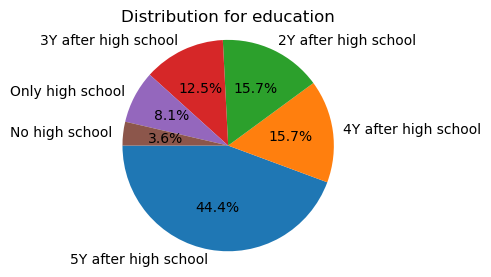

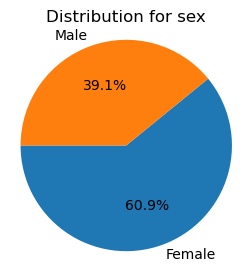

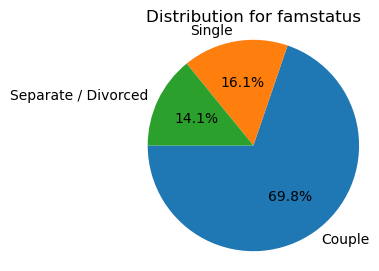

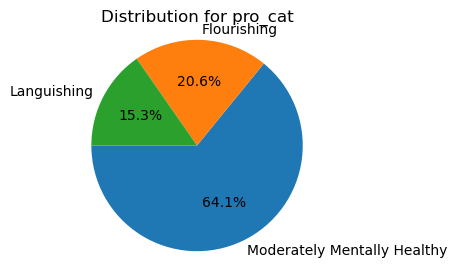

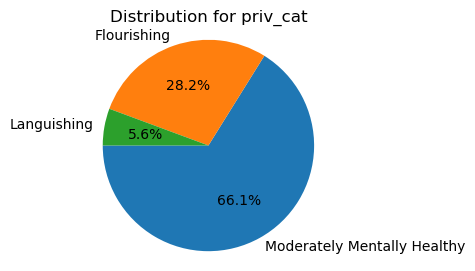

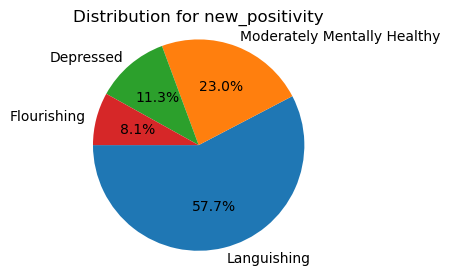

In [89]:
for column_name in df_cat.columns:
    # Get the value counts for the column
    value_counts = df_cat[column_name].value_counts()
    
    # Create a pie chart
    plt.figure(figsize=(3, 3))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=180)
#     plt.legend(loc='lower left', fontsize = 'x-small',ncols=4)
    plt.title(f'Distribution for {column_name}')
    
    # Show the pie chart
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

### Plot their Bar Chart

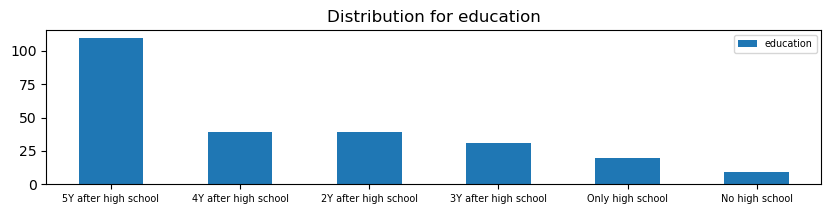

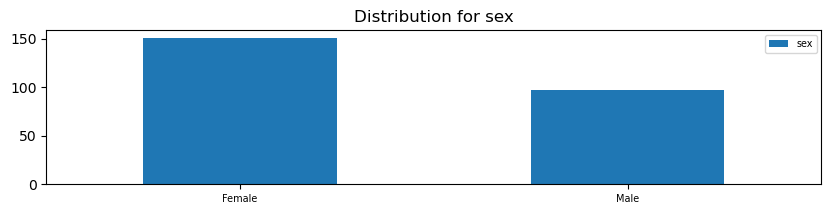

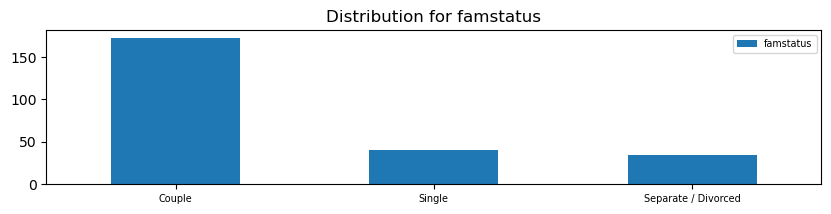

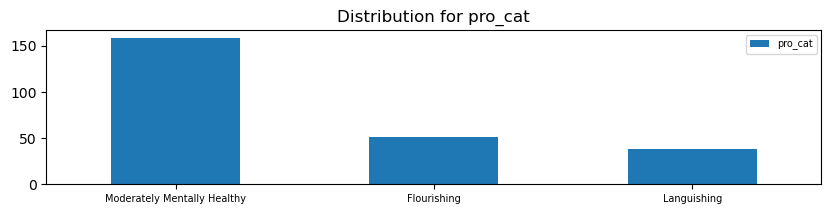

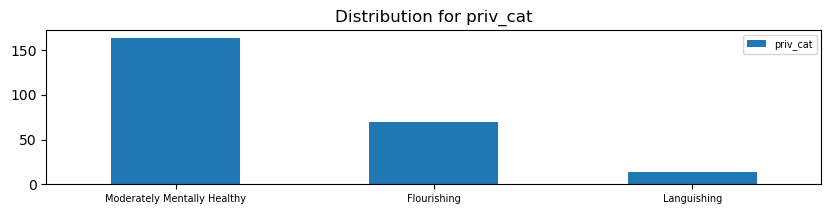

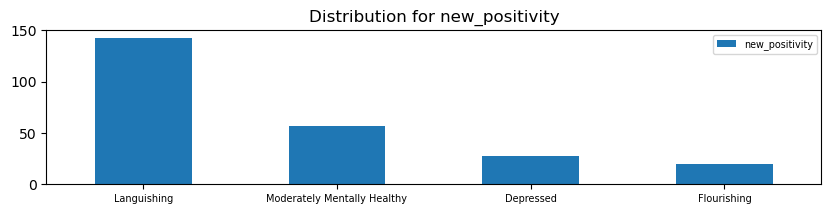

In [90]:
for column_name in df_cat.columns:
    # Get the value counts for the column
    value_counts = df_cat[column_name].value_counts()
    
    # Create a bar chart
    plt.figure(figsize=(10, 2))
    value_counts.plot.bar(legend = True)
    plt.legend(loc='upper right', fontsize = 'x-small',ncols=4)
    plt.title(f'Distribution for {column_name}')  
    plt.xticks(rotation=360, fontsize = 7)
#     for x, y in zip(df_cat[column_name].unique(), df_cat[column_name].value_counts()):
#         plt.text(x, y, '%d' % y, ha='center', va='bottom')
    
    plt.show()

## If the variables are quantitative.

### Plot their histogram

In [91]:
df['ID'] = df['ID'].astype('str')
df.info()

df_qt = df.select_dtypes(exclude=['object'])
df_qt.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              248 non-null    object 
 1   age             248 non-null    int64  
 2   education       248 non-null    object 
 3   sex             248 non-null    object 
 4   famstatus       248 non-null    object 
 5   pro_cat         248 non-null    object 
 6   pro_quant       248 non-null    int64  
 7   priv_cat        248 non-null    object 
 8   priv_quant      248 non-null    int64  
 9   positivity      248 non-null    float64
 10  flow            248 non-null    int64  
 11  new_positivity  248 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 23.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age        

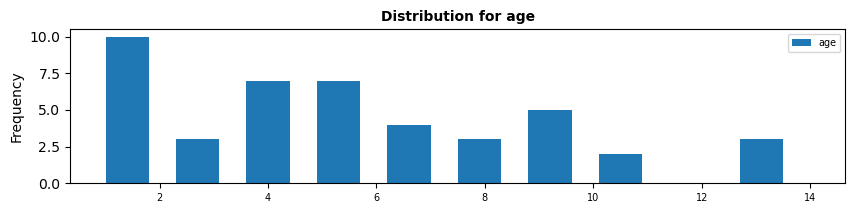

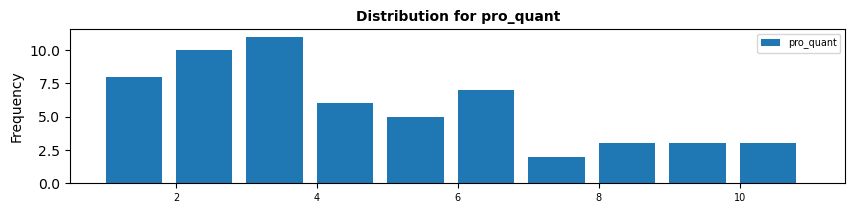

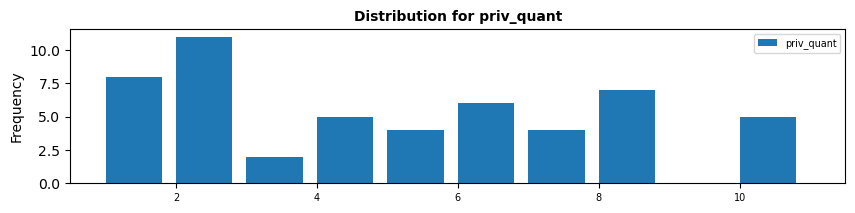

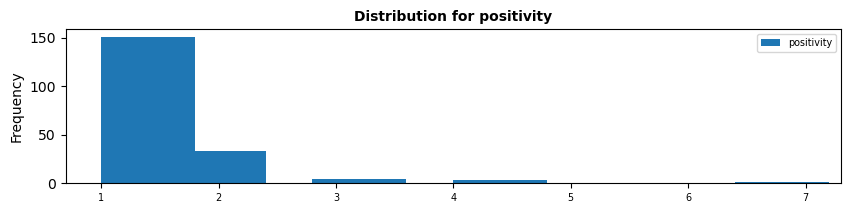

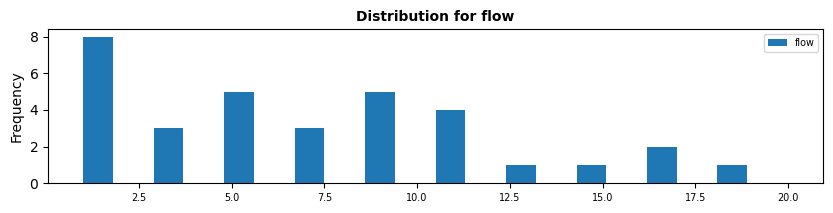

In [92]:
for column_name in df_qt.columns:
    # Get the value counts for the column
    value_counts = df_qt[column_name].value_counts()
    
    # Create a hist chart
    plt.figure(figsize=(10, 2))
    value_counts.plot.hist(legend = True,width=0.8)
    plt.legend(loc='upper right', fontsize = 'x-small',ncols=4)
    plt.title(f'Distribution for {column_name}',fontsize='medium',fontweight='heavy')
    plt.xticks(rotation=360, fontsize = 7)
#     x = df_cat[column_name].value_counts().index
#     y = df_cat[column_name].value_counts()
#     for a,b,i in zip(x,y,range(len(x))): 
#         plt.text(a,b+0.01,"%.0f"%y[i],ha='center',fontsize=20)   

    plt.show()

### Plot their boxplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


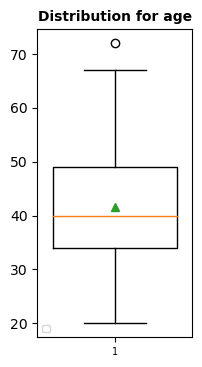

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


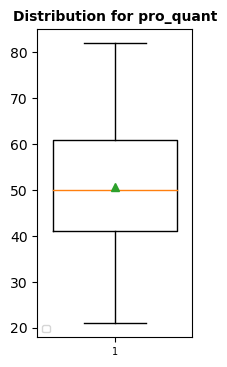

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


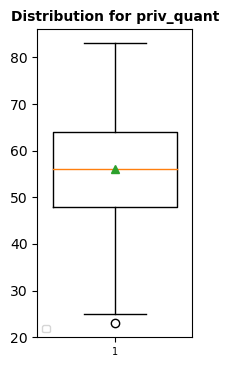

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


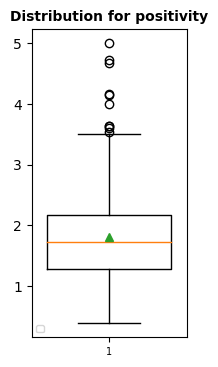

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


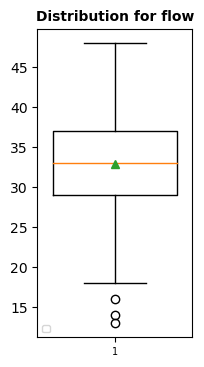

In [93]:
for column_name in df_qt.columns:
    
    # Create a boxplot
    plt.figure(figsize=(2, 4))
    plt.boxplot(df[column_name],showmeans=True, widths=0.8)
    plt.legend(loc='lower left', fontsize = 'x-small',ncols=4)
    plt.title(f'Distribution for {column_name}',fontsize='medium',fontweight='heavy')
    plt.xticks(rotation=360, fontsize = 7)
    plt.show()

# Step 2 – Bivariate Data Analysis

## If the variables are both categorical.

### Generate the contingency table


In [100]:
columns = df_cat.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        
        # Compute the contingency table using pd.crosstab
        contingency_table = pd.crosstab(df_cat[column1], df_cat[column2])
        
        # Print the result
        print(f"Contingency table between {column1} and {column2}:\n")
        print(contingency_table)
        print("\n")   

Contingency table between education and sex:

sex                   Female  Male
education                         
2Y after high school      23    16
3Y after high school      22     9
4Y after high school      22    17
5Y after high school      67    43
No high school             5     4
Only high school          12     8


Contingency table between education and famstatus:

famstatus             Couple  Separate / Divorced  Single
education                                                
2Y after high school      27                    7       5
3Y after high school      18                    7       6
4Y after high school      27                    6       6
5Y after high school      84                   10      16
No high school             7                    1       1
Only high school          10                    4       6


Contingency table between education and pro_cat:

pro_cat               Flourishing  Languishing  Moderately Mentally Healthy
education                   

### Check the significance of their relationship with the chi-square test & provide Cramer’s V

In [101]:
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        
        # Compute the contingency table using pd.crosstab
#         contingency_table = pd.crosstab(df[column1], df[column2])
        p_value = round(chi2_contingency(pd.crosstab(df_cat[column1], df_cat[column2]))[1],4)
        if p_value < 0.05:       
        # Print the result
            print(f"The p-value from chi-square test between {column1} and {column2} is {p_value}, since it is smaller than the significance level, we should reject the null hypithesis, {column1} and {column2} ARE significantly linked." )
        else:
            print(f"The p-value from chi-square test between {column1} and {column2} is {p_value}, since it is larger than the significance level, we should not reject the null hypithesis, {column1} and {column2} ARE NOT significantly linked.")

The p-value from chi-square test between education and sex is 0.8728, since it is larger than the significance level, we should not reject the null hypithesis, education and sex ARE NOT significantly linked.
The p-value from chi-square test between education and famstatus is 0.4217, since it is larger than the significance level, we should not reject the null hypithesis, education and famstatus ARE NOT significantly linked.
The p-value from chi-square test between education and pro_cat is 0.2886, since it is larger than the significance level, we should not reject the null hypithesis, education and pro_cat ARE NOT significantly linked.
The p-value from chi-square test between education and priv_cat is 0.3594, since it is larger than the significance level, we should not reject the null hypithesis, education and priv_cat ARE NOT significantly linked.
The p-value from chi-square test between education and new_positivity is 0.0298, since it is smaller than the significance level, we shoul

In [96]:
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        
        # Compute the contingency table using pd.crosstab
#         contingency_table = pd.crosstab(df[column1], df[column2])
        X2 = chi2_contingency(pd.crosstab(df[column1], df[column2]))[0]
        N = len(df)
        minimum_dimension = min(pd.crosstab(df[column1], df[column2]).shape)-1
        # Calculate Cramer's V
        Cramers_V = round(np.sqrt((X2/N) / minimum_dimension),2)
        if Cramers_V < 0.1:       
        # Print the result
            print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it below 0.1,the strength of the relationship between is not significant.")
        elif Cramers_V >= 0.1 and Cramers_V < 0.3 :
            print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it between 0.1 and 0.3,the strength of the relationship between is small.")
        elif Cramers_V >= 0.3 and Cramers_V < 0.5 :
            print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it between 0.3 and 0.5,the strength of the relationship between is moderate.")
        elif Cramers_V >= 0.5 and Cramers_V < 0.7 :
            print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it between 0.5 and 0.7,the strength of the relationship between is strong.")
        elif Cramers_V >= 0.7 and Cramers_V < 0.9 :
            print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it between 0.3 and 0.5,the strength of the relationship between is very strong.")
        else:
            print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it above 0.9, check if these two variables have colinearity problem.")

The Cramer's V between education and sex is 0.09, since it below 0.1,the strength of the relationship between is not significant.
The Cramer's V between education and famstatus is 0.14, since it between 0.1 and 0.3,the strength of the relationship between is small.
The Cramer's V between education and pro_cat is 0.16, since it between 0.1 and 0.3,the strength of the relationship between is small.
The Cramer's V between education and priv_cat is 0.15, since it between 0.1 and 0.3,the strength of the relationship between is small.
The Cramer's V between education and new_positivity is 0.19, since it between 0.1 and 0.3,the strength of the relationship between is small.
The Cramer's V between sex and famstatus is 0.18, since it between 0.1 and 0.3,the strength of the relationship between is small.
The Cramer's V between sex and pro_cat is 0.04, since it below 0.1,the strength of the relationship between is not significant.
The Cramer's V between sex and priv_cat is 0.07, since it below 0.

### Plot their side-by-side bar charts

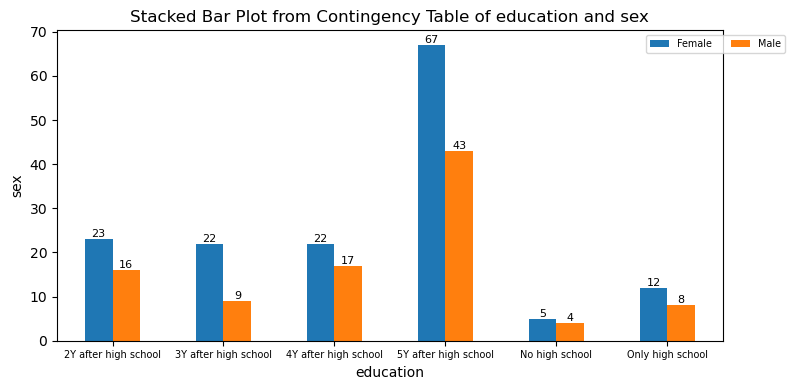

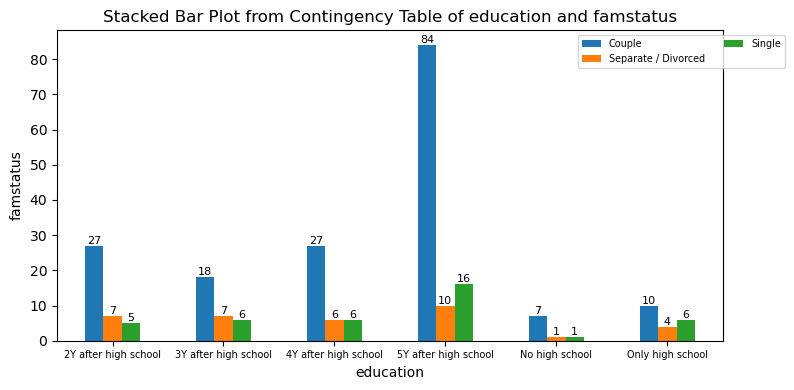

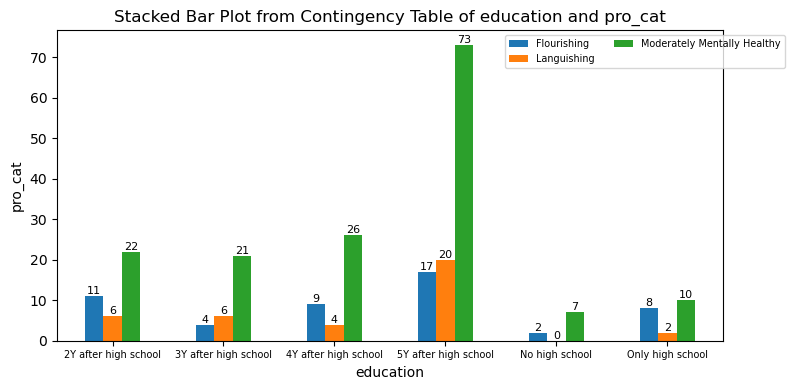

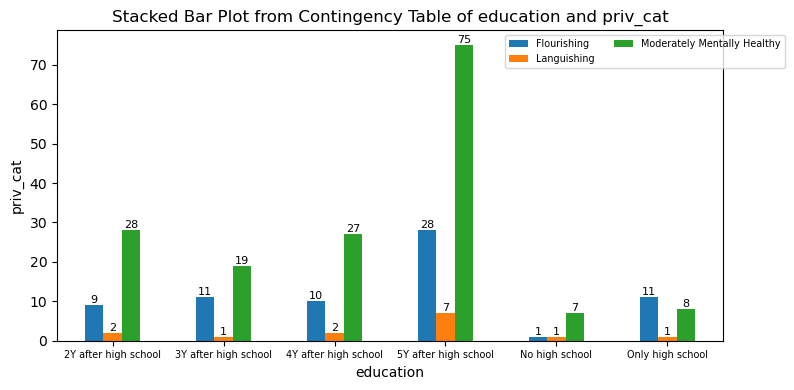

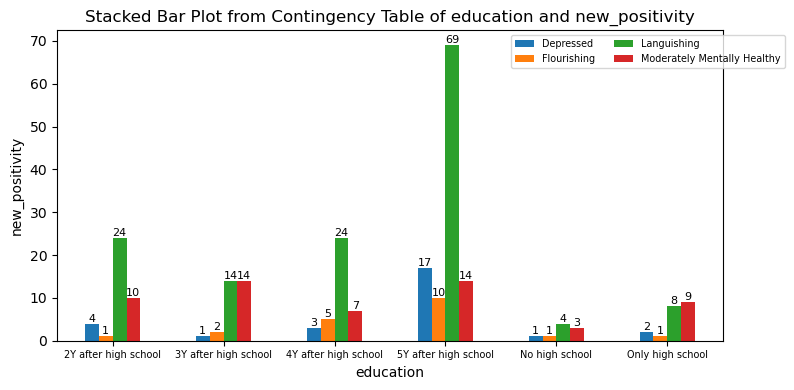

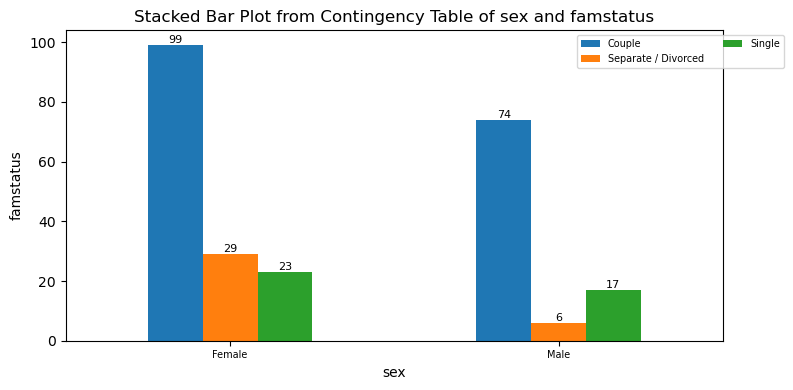

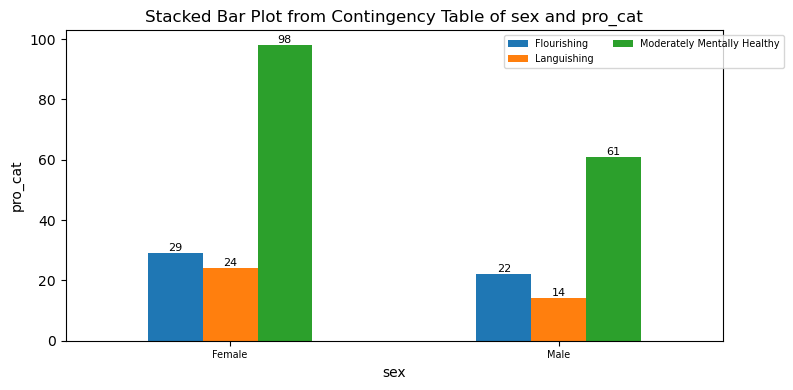

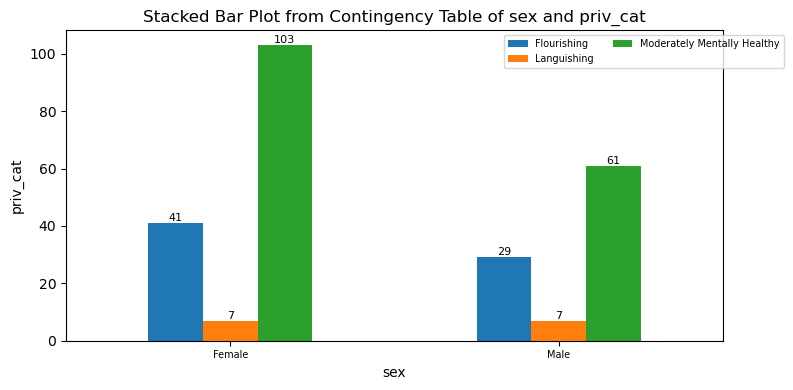

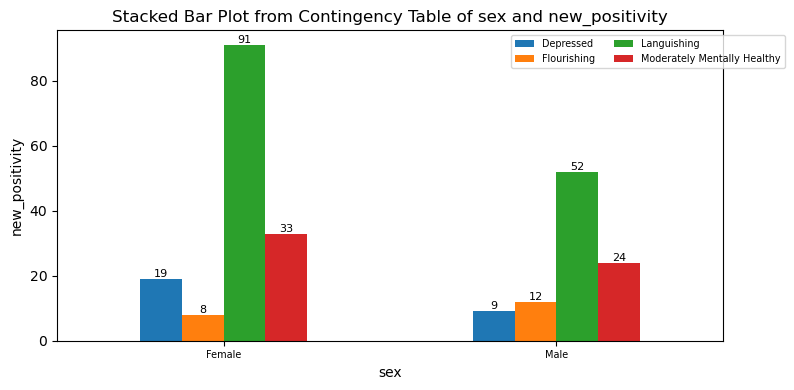

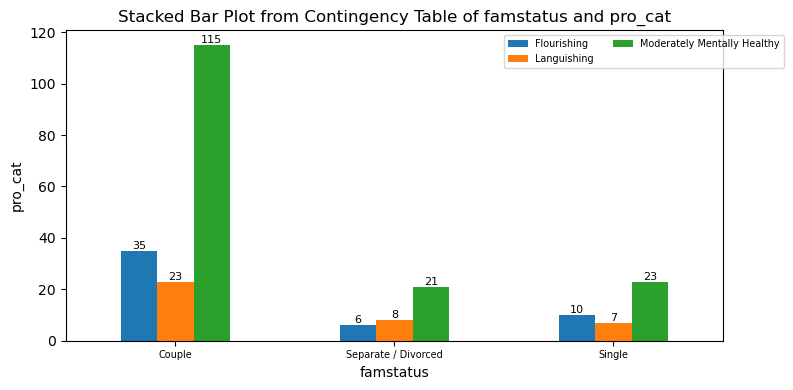

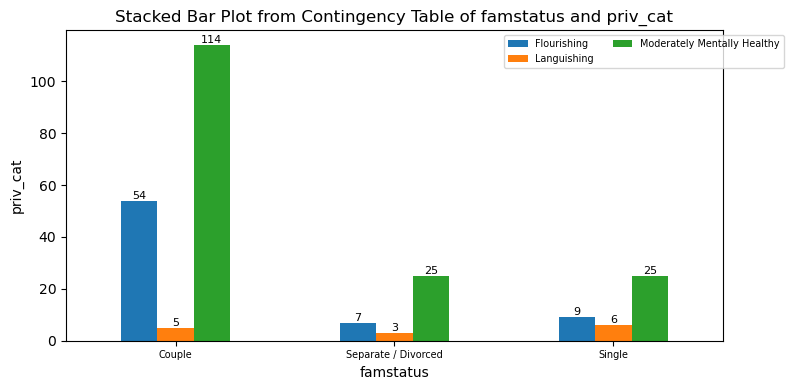

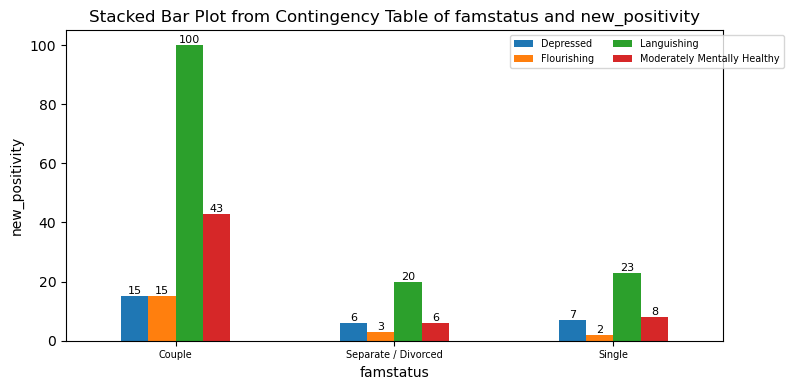

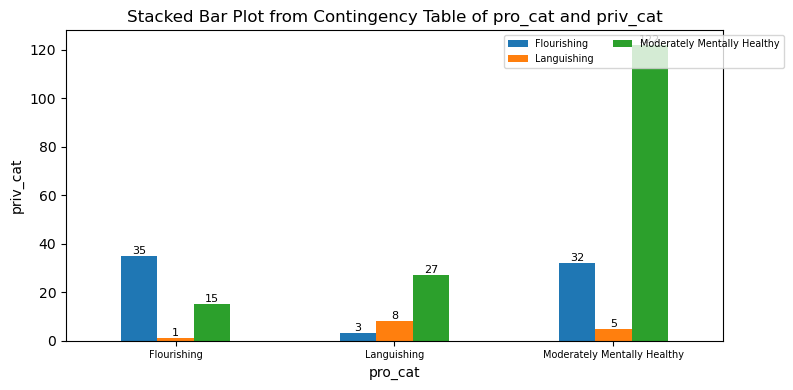

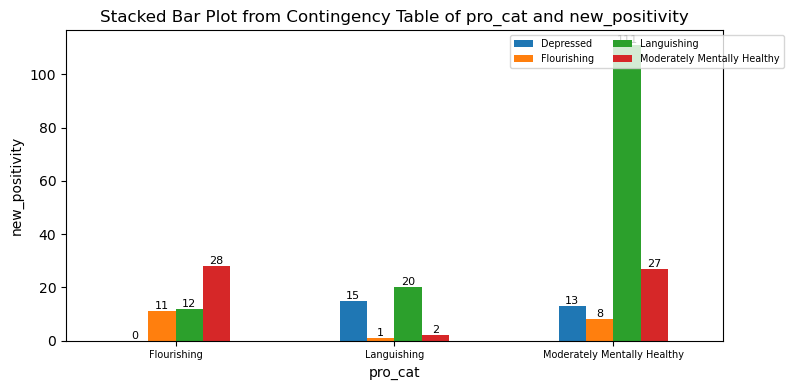

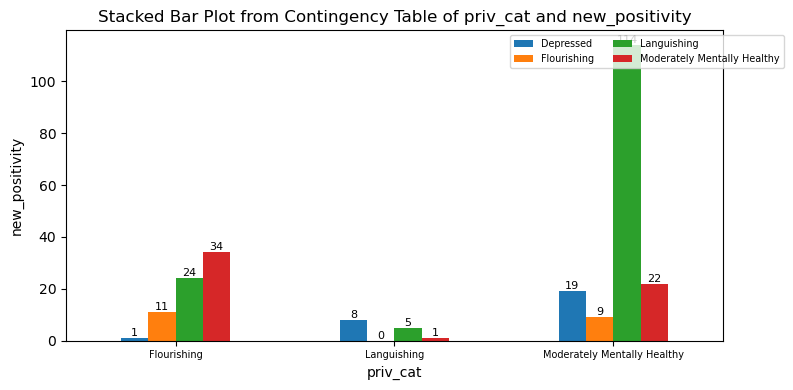

In [102]:
columns = df_cat.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        
        # Compute the contingency table using pd.crosstab
        contingency_table = pd.crosstab(df_cat[column1], df_cat[column2])
        
        # Plot the contingency table as a bar plot
        ax = contingency_table.plot(kind='bar', figsize = (8,4))

        # Add labels and title
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.title(f'Stacked Bar Plot from Contingency Table of {column1} and {column2}')
        plt.xticks(rotation=360, fontsize = 7)
        plt.legend(bbox_to_anchor=(1.1, 1),loc='upper right', fontsize = 'x-small', ncol = 2)
        
        
        for c in ax.containers:

            # set the bar label
            ax.bar_label(c, 
#                          label_type='center',
                         size=8)

        # Show the plot
        plt.tight_layout()
        plt.show()

### Plot their stacked bar charts

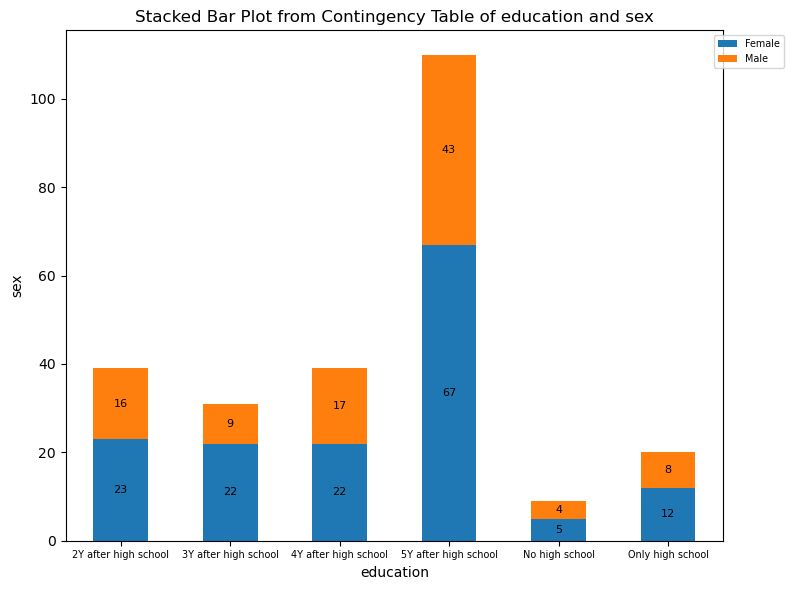

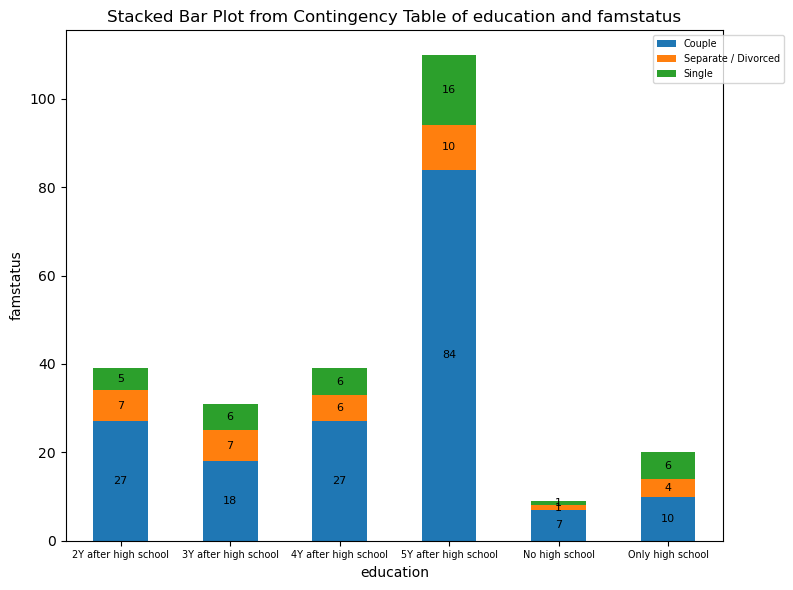

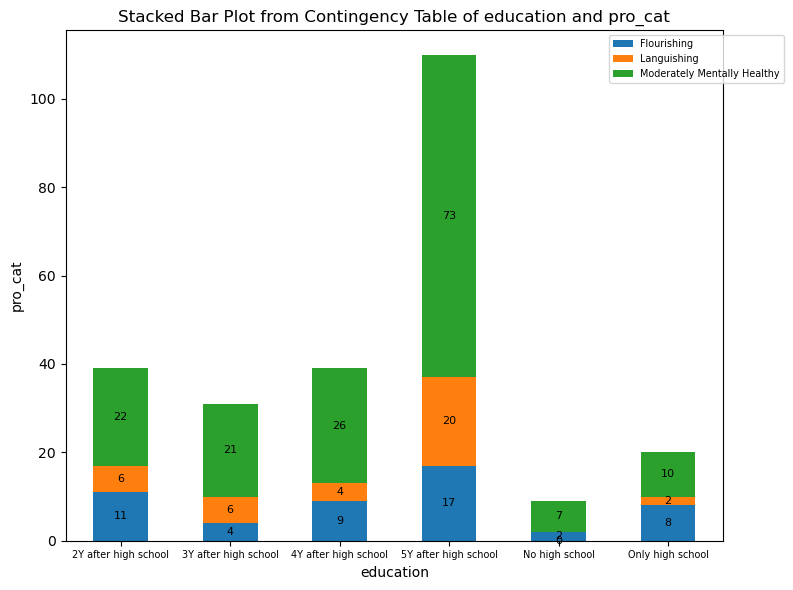

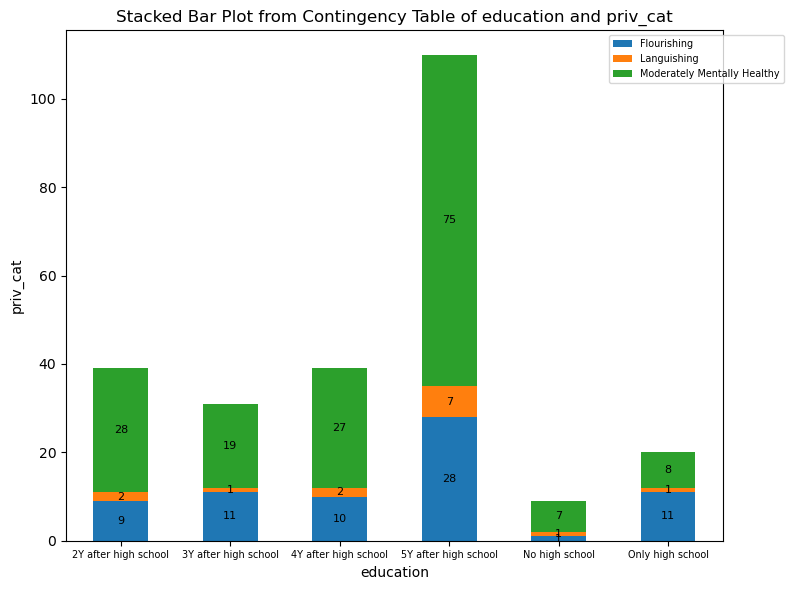

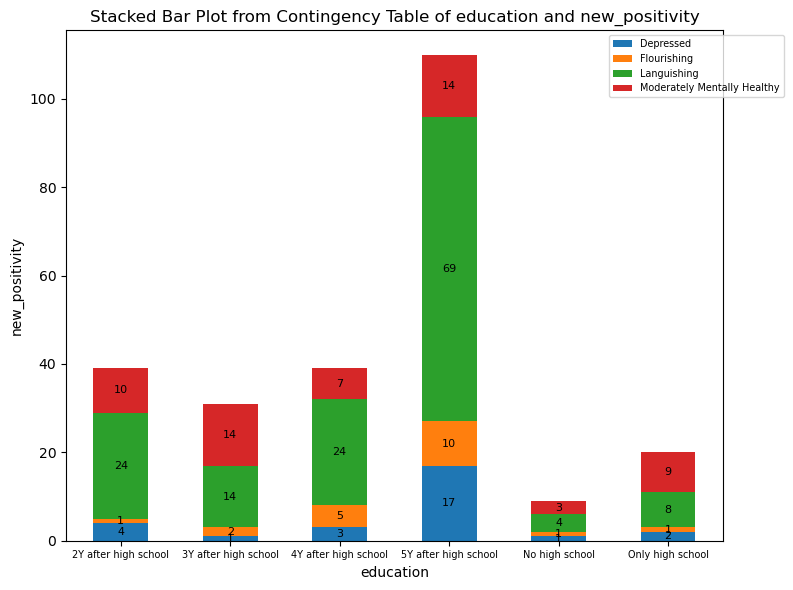

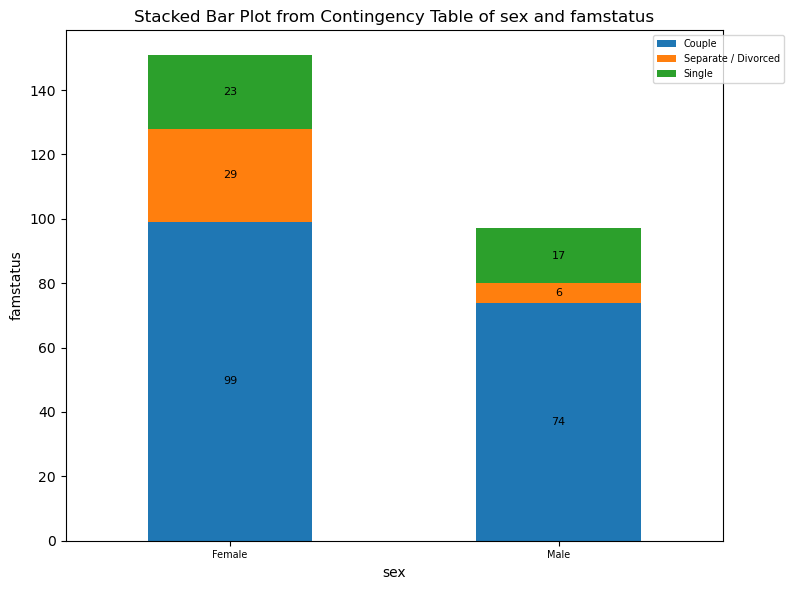

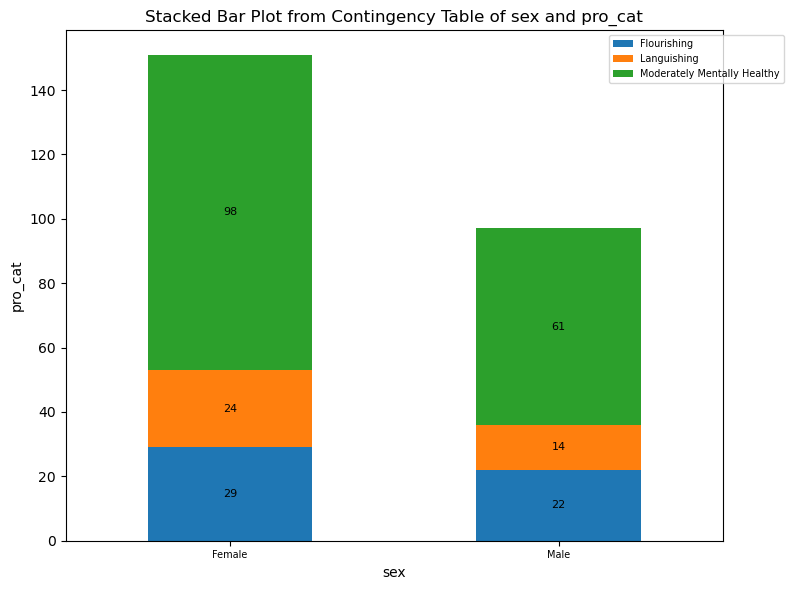

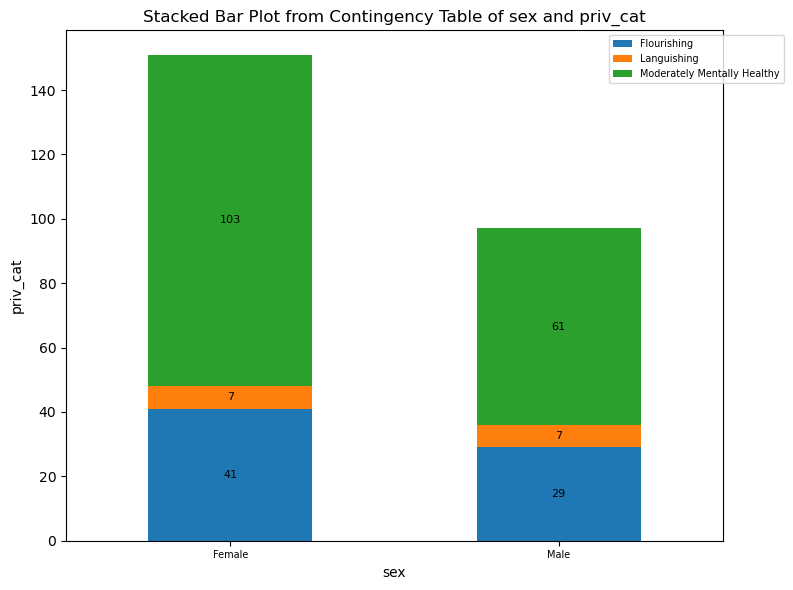

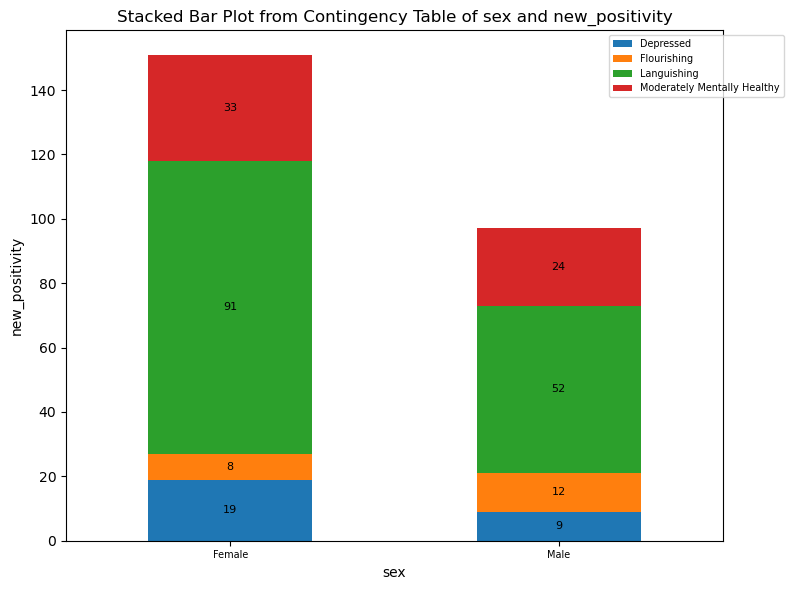

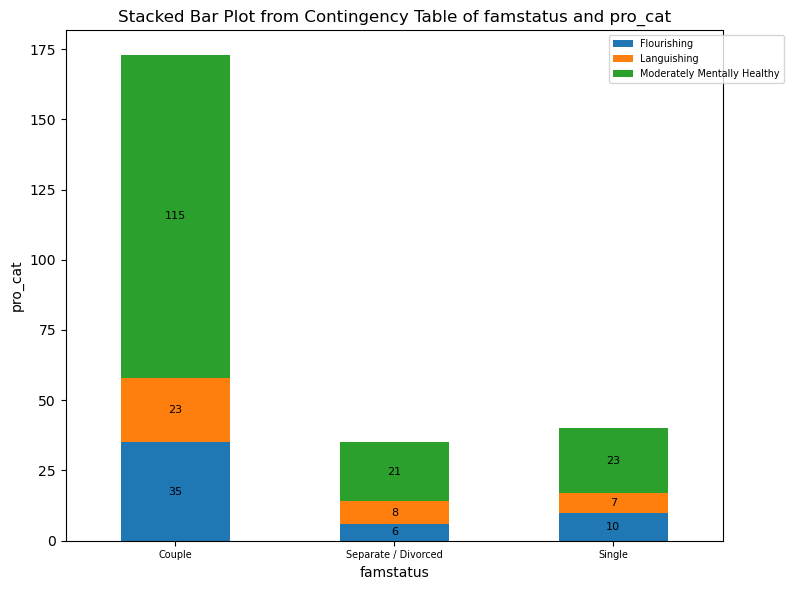

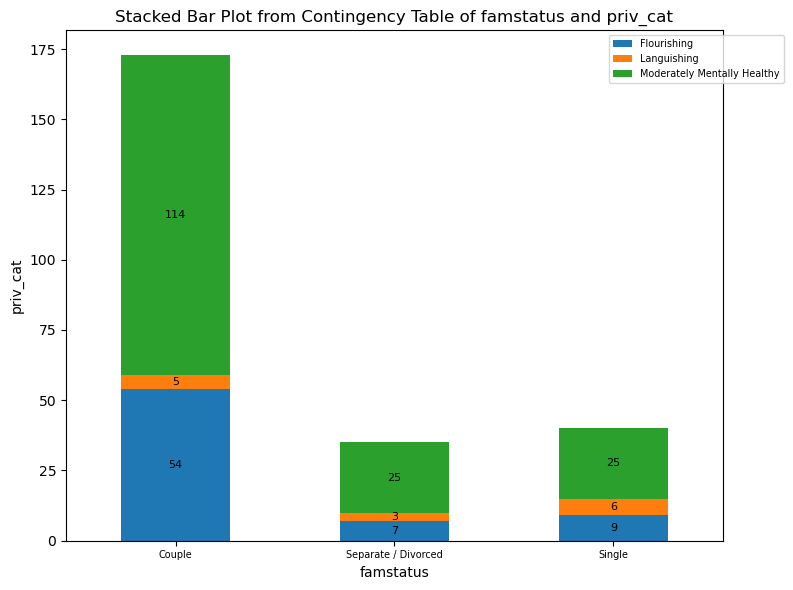

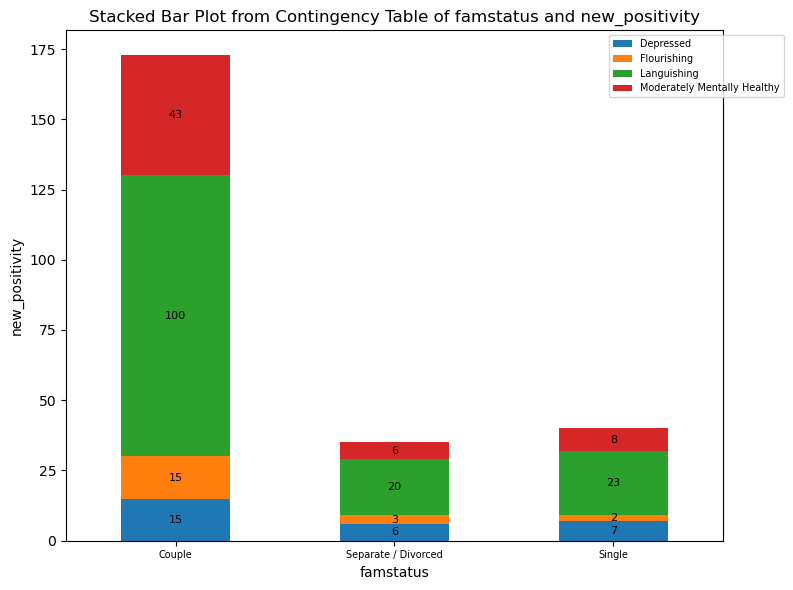

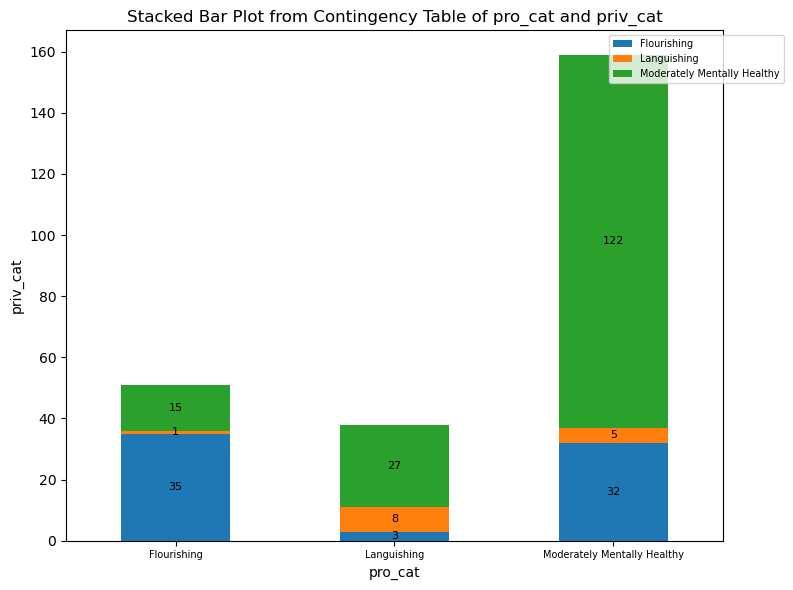

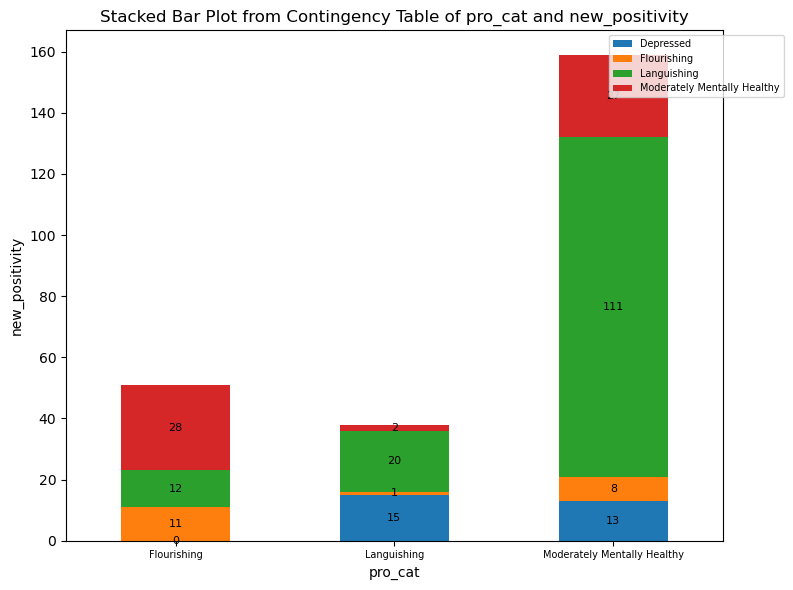

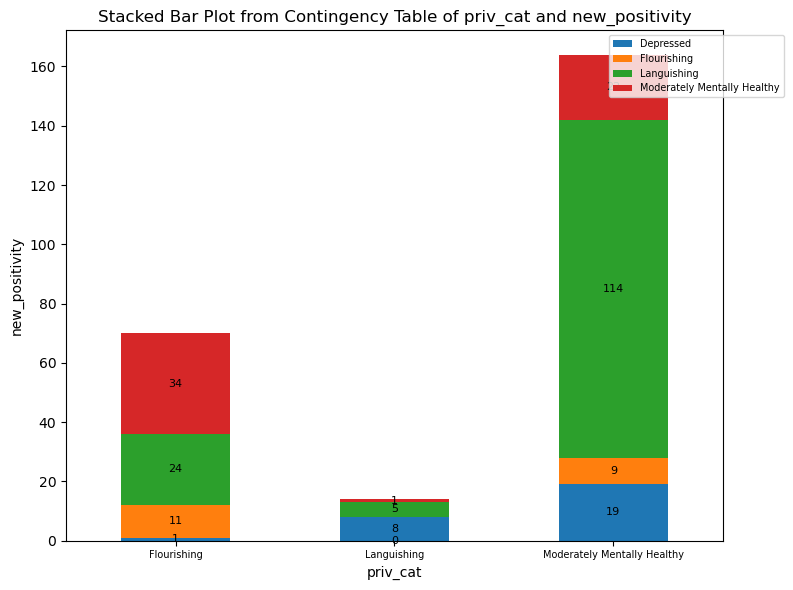

In [103]:
columns = df_cat.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        
        # Compute the contingency table using pd.crosstab
        contingency_table = pd.crosstab(df_cat[column1], df_cat[column2])
        
        # Plot the contingency table as a bar plot
        ax = contingency_table.plot(kind='bar', stacked=True, figsize = (8,6))

        # Add labels and title
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.title(f'Stacked Bar Plot from Contingency Table of {column1} and {column2}')
        plt.xticks(rotation=360, fontsize = 7)
        plt.legend(bbox_to_anchor=(1.1, 1),loc='upper right', fontsize = 'x-small', ncol = 1)
        
        for c in ax.containers:

            # set the bar label
            ax.bar_label(c, label_type='center',  size=8)


        # Show the plot
        plt.tight_layout()
        plt.show()

## If the variables are both quantitative.

### Compute the correlation (table)


In [99]:
df_qt.info() 
df_qt.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         248 non-null    int64  
 1   pro_quant   248 non-null    int64  
 2   priv_quant  248 non-null    int64  
 3   positivity  248 non-null    float64
 4   flow        248 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 9.8 KB


,age,pro_quant,priv_quant,positivity,flow
age,1.000000,0.229625,0.151607,0.257054,0.367994
pro_quant,0.229625,1.000000,0.635679,0.603502,0.536229
priv_quant,0.151607,0.635679,1.000000,0.636000,0.409439
positivity,0.257054,0.603502,0.636000,1.000000,0.439782
flow,0.367994,0.536229,0.409439,0.439782,1.000000


### Check the significance of their relationship with the correlation test & provide the r value

In [119]:
columns = df_qt.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        
        #calculation correlation coefficient and p-value between column1 and column2
        result = pearsonr(df_qt[column1], df_qt[column2])
        r_value = round(result[0],4)
        pvalue = round(result[1],4)
        
        # Print the result
        print(f"The Pearson correlation coefficient (r-value) between {column1} and {column2} is {r_value}, and the two-tailed p-value is {pvalue}") 
       
        if r_value == -1:
            print(f"Since the correlation coefficient is -1, there is a perfect negative association between {column1} and {column2}")
        elif r_value > -1 and r_value <= -0.5 :
            print(f"Since the correlation coefficient is close to -1, there is a strong negative association between {column1} and {column2}")
        elif r_value > -0.5   and r_value < 0 :
            print(f"Since the correlation coefficient is below and close to 0, there is a slightly negative association between {column1} and {column2}")
        elif r_value == 0 :
            print(f"Since the correlation coefficient is 0, there is no association between {column1} and {column2}") 
        elif r_value > 0   and r_value <= 0.5 :
            print(f"Since the correlation coefficient is above and close to 0, there is a slightly positive association between {column1} and {column2}")
        elif r_value > 0.5   and r_value < 1 :
            print(f"Since the correlation coefficient is close to 1, there is a strongly postive association between {column1} and {column2}")
        elif r_value == 1:
            print(f"Since the correlation coefficient is 1, there is a perfect positive association between {column1} and {column2}")
        else:
            print("Something is wrong, check your code ASAP!")
            
            
            
        if pvalue < 0.05 :
            print(f", and the corresponding p-value is less than .05, there is a statistically significant association between the two variables.")
        else:
            print(f", and the corresponding p-value is larger than .05, there is no statistically significant association between the two variables.")

The Pearson correlation coefficient (r-value) between age and pro_quant is 0.2296, and the two-tailed p-value is 0.0003
Since the correlation coefficient is above and close to 0, there is a slightly positive association between age and pro_quant
, and the corresponding p-value is less than .05, there is a statistically significant association between the two variables.
The Pearson correlation coefficient (r-value) between age and priv_quant is 0.1516, and the two-tailed p-value is 0.0169
Since the correlation coefficient is above and close to 0, there is a slightly positive association between age and priv_quant
, and the corresponding p-value is less than .05, there is a statistically significant association between the two variables.
The Pearson correlation coefficient (r-value) between age and positivity is 0.2571, and the two-tailed p-value is 0.0
Since the correlation coefficient is above and close to 0, there is a slightly positive association between age and positivity
, and the

### Plot their scatter plot (matrix)

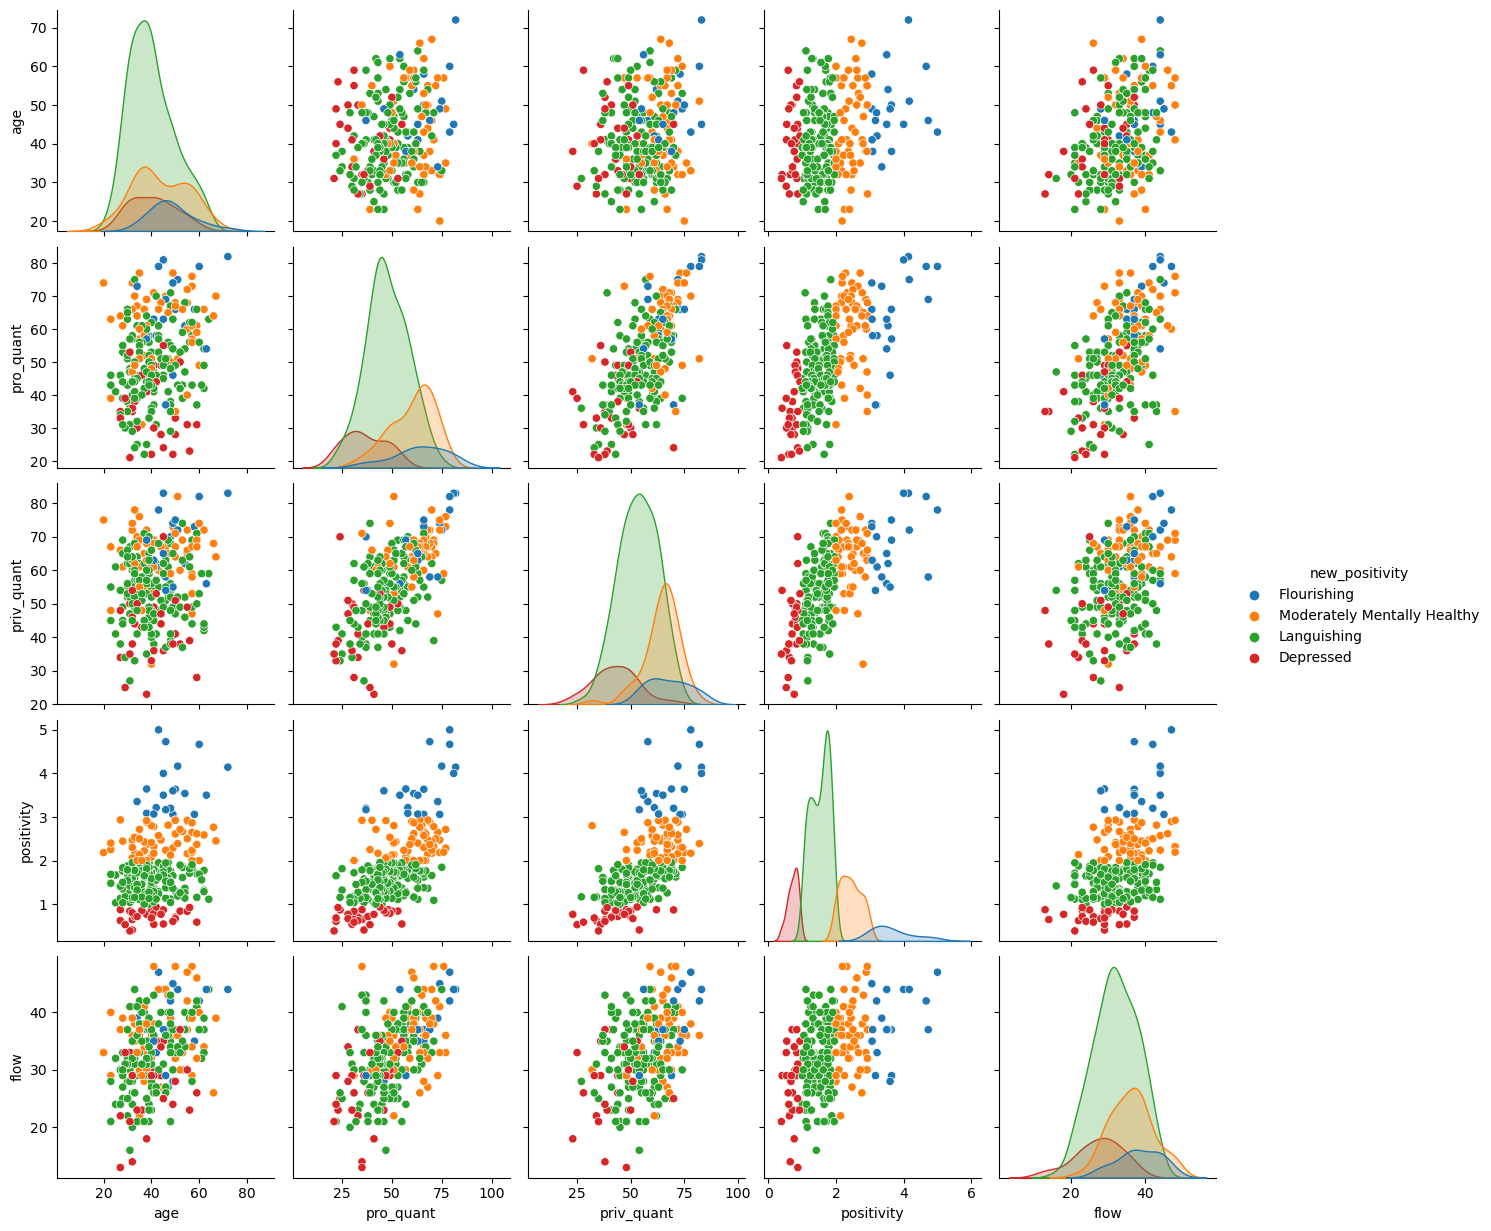

In [120]:
sns.pairplot(df, hue="new_positivity")

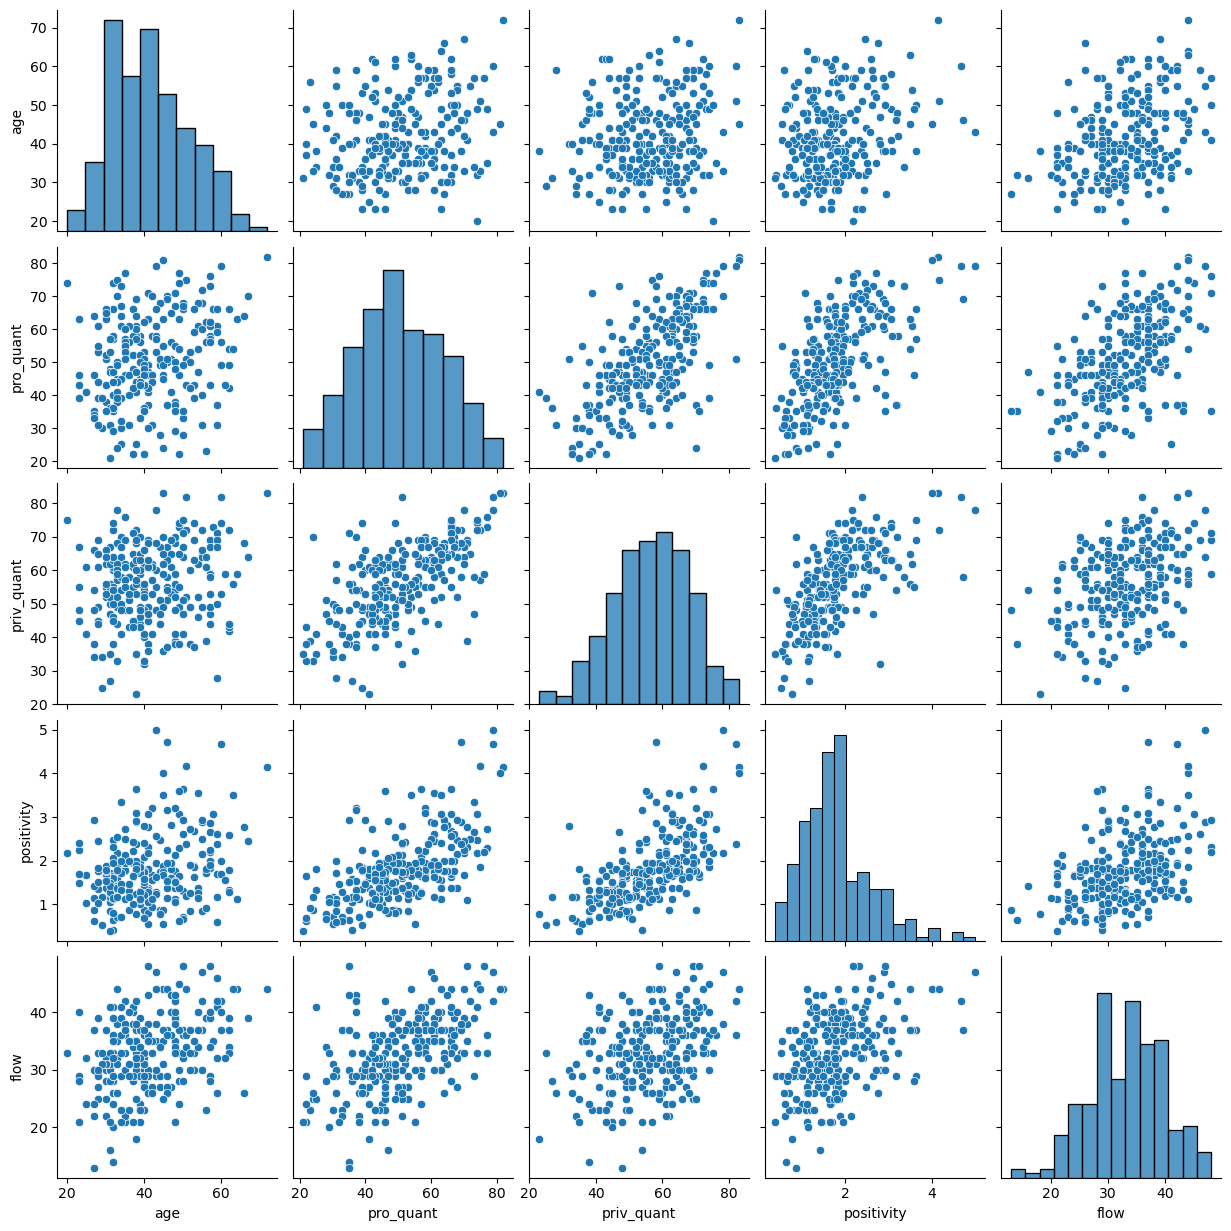

In [121]:
sns.pairplot(df_qt)

## If the variables are mixed categorical & quantitative.


### Compute the anova table

### Check the significance of the difference in values between groups

### Plot the grouped boxplots

Question: 

Which variables could be selected as outcome (target, response, dependent variable) or variable to be explained from the others? 

Justify your suggestions with statistical & theoretical arguments.


# Step 3 –  Modeling

Once you have selected an outcome among the variables of your dataset, the other variables become the predictors. Now the goal is to find a function that captures in the best possible way the relationships between the outcome and the predictors. This process is called “modeling” and statistical learning is one way of addressing it.

One goal of modeling is thus to explain the variability (or variance) in the outcome from the predictors. This approach to modeling is associated with “supervised learning” in statistical learning.

However, this variance may not be explained by the predictors only, i.e., by the relationship between the predictors and the outcome only. It may also be explained by the existence of subgroups of individual instances or subgroup heterogeneity. The process to account for these subgroups is associated with “unsupervised learning” in statistical learning.

On other occasions, the number of variables is too numerous, many of which are associated (correlated or linked) in various ways. In such cases, the relationships between the outcome and the predictors can become confusing, opaque or too complex. To reduce this complexity and to simplify interpretability, dimension reduction is recommended. The set of tools to reduce dimensions is also associated with “unsupervised learning” in statistical learning.
